In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.5, random_state=42)


=== Elbow Method Demo ===


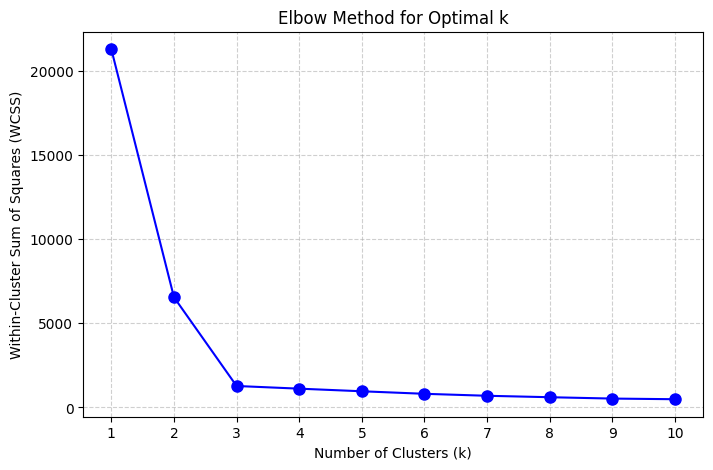

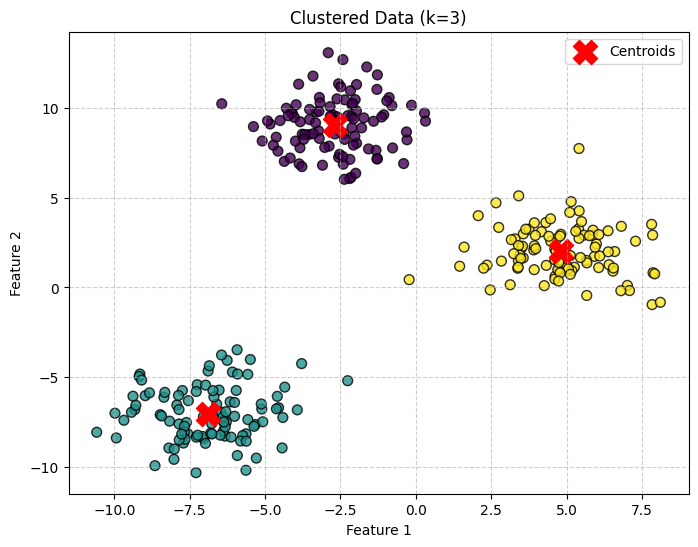

In [2]:
# ============ Elbow Method ============
def elbow_method_demo(X):
    wcss = []
    k_values = range(1, 11)
    
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    
    # Plot Elbow Method
    plt.figure(figsize=(8, 5))
    plt.plot(k_values, wcss, marker='o', linestyle='-', color='b', markersize=8)
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
    plt.title('Elbow Method for Optimal k')
    plt.xticks(k_values)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()
    
    # Apply K-means with optimal k (from elbow, let's say k=3)
    optimal_k = 3
    kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X)
    
    # Plot clustered data
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=50, edgecolors='k', alpha=0.8)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                s=300, c='red', marker='X', label='Centroids')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Clustered Data (k={optimal_k})')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

print("\n=== Elbow Method Demo ===")
elbow_method_demo(X)


=== Silhouette Method Demo ===


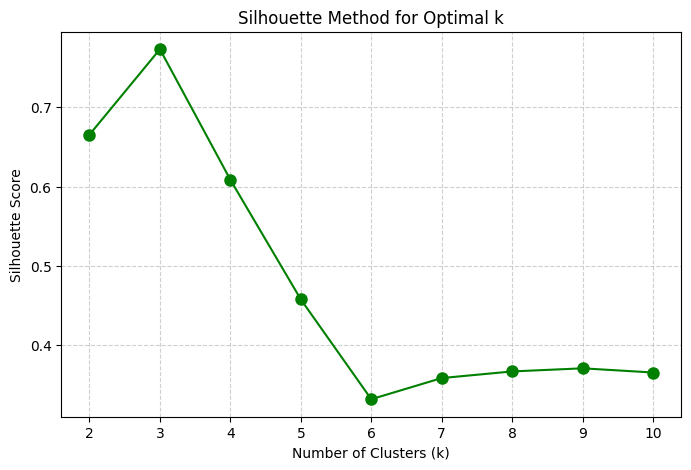

Optimal number of clusters based on Silhouette Score: 3


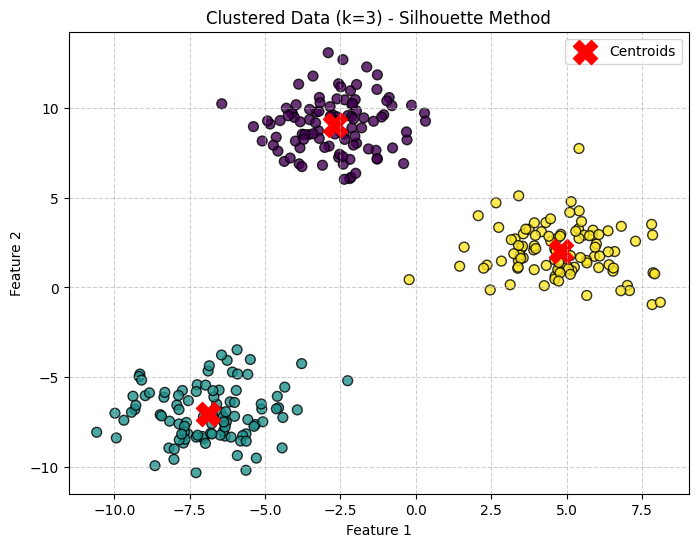

In [3]:
# ============ Silhouette Score ============
def silhouette_method_demo(X):
    silhouette_scores = []
    k_values = range(2, 11)  # Silhouette requires at least 2 clusters
    
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(X)
        score = silhouette_score(X, cluster_labels)
        silhouette_scores.append(score)
    
    # Plot Silhouette Scores
    plt.figure(figsize=(8, 5))
    plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='g', markersize=8)
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Method for Optimal k')
    plt.xticks(k_values)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()
    
    # Find optimal k
    optimal_k = k_values[np.argmax(silhouette_scores)]
    print(f"Optimal number of clusters based on Silhouette Score: {optimal_k}")
    
    # Apply K-means with optimal k
    kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X)
    
    # Plot clustered data
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=50, edgecolors='k', alpha=0.8)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                s=300, c='red', marker='X', label='Centroids')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Clustered Data (k={optimal_k}) - Silhouette Method')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

print("\n=== Silhouette Method Demo ===")
silhouette_method_demo(X)


=== Gap Statistic Demo ===


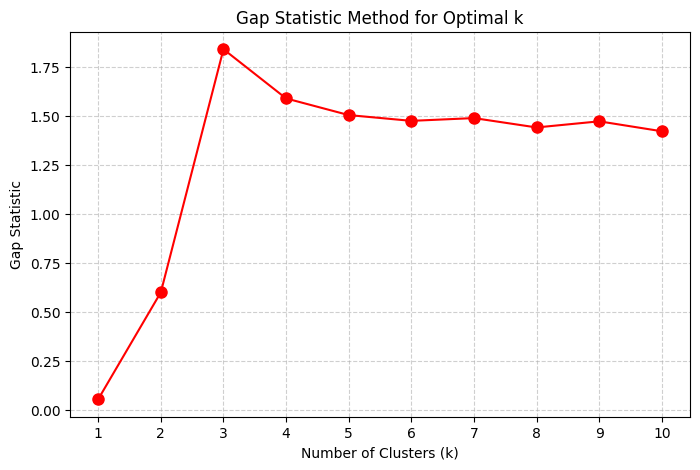

Optimal number of clusters based on Gap Statistic: 3


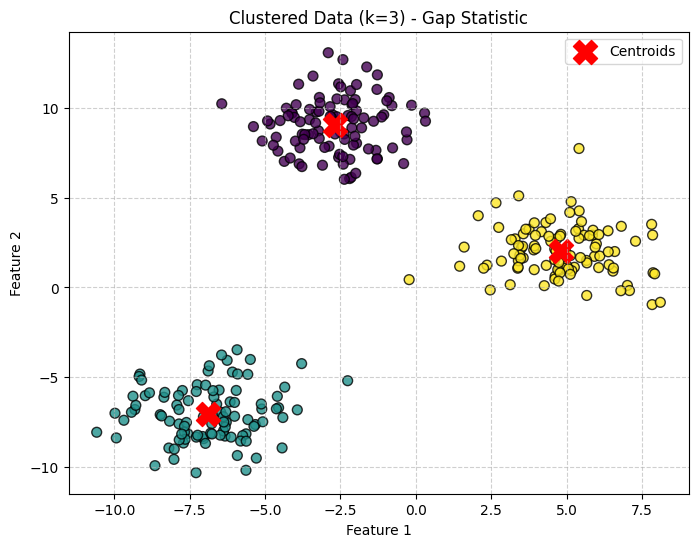

In [4]:
# ============ Gap Statistic ============
def compute_gap_statistic(X, k_max=10, n_refs=10):
    ks = range(1, k_max + 1)
    wcss = []
    ref_wcss = np.zeros((len(ks), n_refs))
    
    # Compute WCSS for actual data
    for i, k in enumerate(ks):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
        
        # Compute WCSS for random reference datasets
        for j in range(n_refs):
            random_data = np.random.uniform(X.min(axis=0), X.max(axis=0), X.shape)
            kmeans_ref = KMeans(n_clusters=k, random_state=42, n_init=10)
            kmeans_ref.fit(random_data)
            ref_wcss[i, j] = kmeans_ref.inertia_
    
    # Compute gap statistic
    gaps = np.mean(np.log(ref_wcss), axis=1) - np.log(wcss)
    return ks, gaps

def gap_statistic_demo(X):
    
    # Calculate Gap Statistic
    k_values, gap_values = compute_gap_statistic(X, k_max=10)
    
    # Plot Gap Statistic
    plt.figure(figsize=(8, 5))
    plt.plot(k_values, gap_values, marker='o', linestyle='-', color='r', markersize=8)
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Gap Statistic')
    plt.title('Gap Statistic Method for Optimal k')
    plt.xticks(k_values)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()
    
    # Find optimal k
    optimal_k = k_values[np.argmax(gap_values)]
    print(f"Optimal number of clusters based on Gap Statistic: {optimal_k}")
    
    # Apply K-means with optimal k
    kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X)
    
    # Plot clustered data
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=50, edgecolors='k', alpha=0.8)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                s=300, c='red', marker='X', label='Centroids')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Clustered Data (k={optimal_k}) - Gap Statistic')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

print("\n=== Gap Statistic Demo ===")
gap_statistic_demo(X)

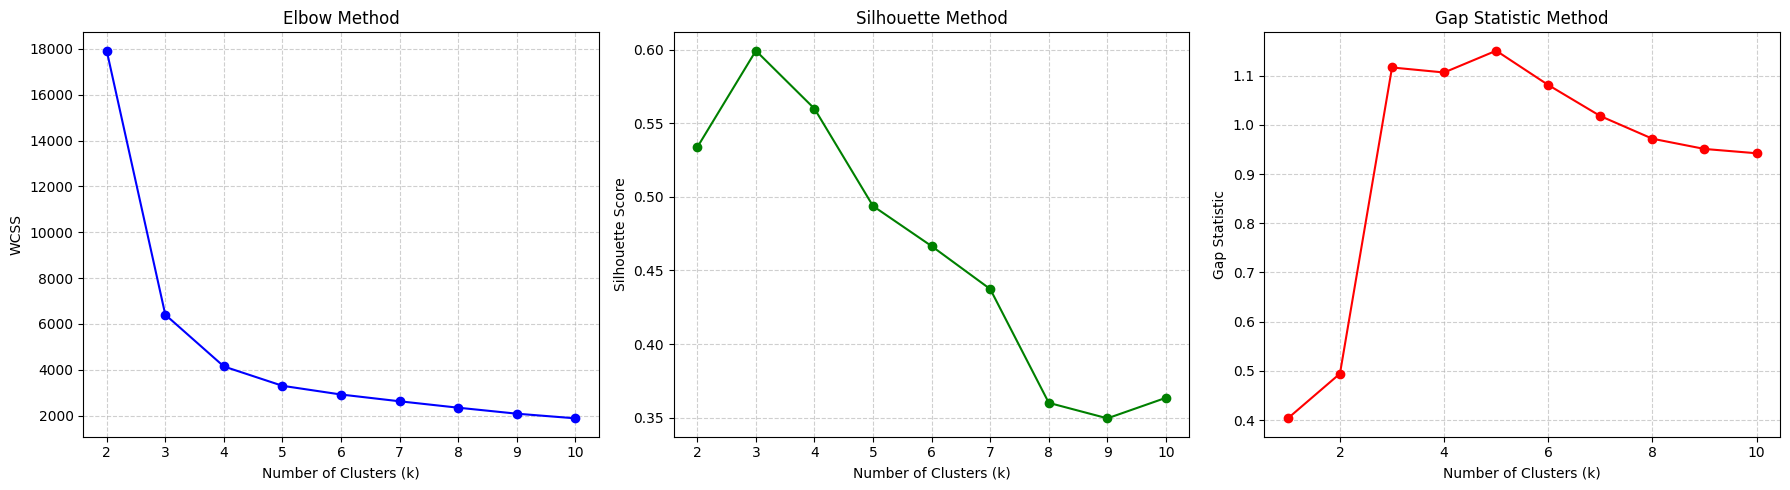

Optimal k based on Elbow Method: 4
Optimal k based on Silhouette Score: 3
Optimal k based on Gap Statistic: 5


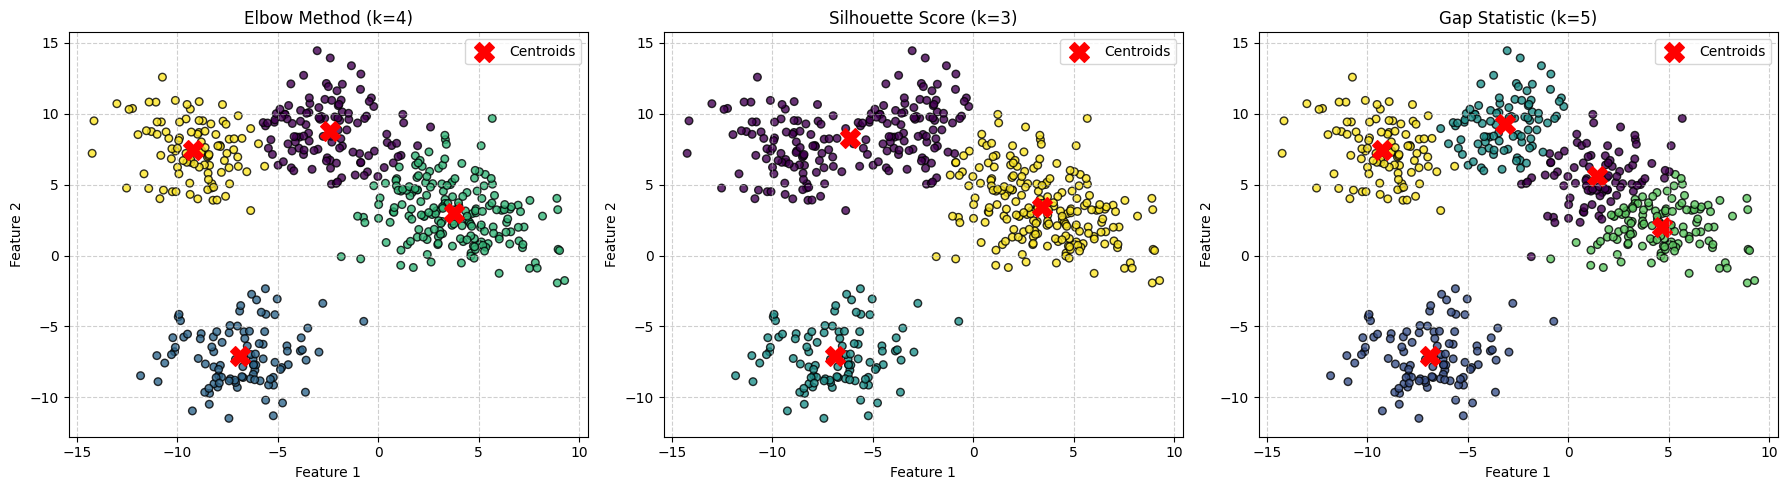

In [5]:
def compare_all_methods():
    # Generate a more complex dataset
    X, _ = make_blobs(n_samples=500, centers=5, cluster_std=2.0, random_state=42)
    
    
    # Compute metrics for different k values
    k_values = range(2, 11)
    wcss = []
    silhouette_scores = []
    
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(X)
        wcss.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(X, cluster_labels))
    
    # Plot comparison
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # Elbow Method
    axes[0].plot(k_values, wcss, marker='o', linestyle='-', color='b', markersize=6)
    axes[0].set_xlabel('Number of Clusters (k)')
    axes[0].set_ylabel('WCSS')
    axes[0].set_title('Elbow Method')
    axes[0].grid(True, linestyle='--', alpha=0.6)
    
    # Silhouette Score
    axes[1].plot(k_values, silhouette_scores, marker='o', linestyle='-', color='g', markersize=6)
    axes[1].set_xlabel('Number of Clusters (k)')
    axes[1].set_ylabel('Silhouette Score')
    axes[1].set_title('Silhouette Method')
    axes[1].grid(True, linestyle='--', alpha=0.6)
    
    # Gap Statistic
    k_values_gap, gap_values = compute_gap_statistic(X, k_max=10)
    axes[2].plot(k_values_gap, gap_values, marker='o', linestyle='-', color='r', markersize=6)
    axes[2].set_xlabel('Number of Clusters (k)')
    axes[2].set_ylabel('Gap Statistic')
    axes[2].set_title('Gap Statistic Method')
    axes[2].grid(True, linestyle='--', alpha=0.6)
    
    plt.tight_layout()
    plt.savefig("./figures/k_optimization.png")
    plt.show()
    
    # Select optimal k for each method
    optimal_k_elbow = 4  # Visual inspection
    optimal_k_silhouette = k_values[np.argmax(silhouette_scores)]
    optimal_k_gap = list(k_values_gap)[np.argmax(gap_values)]
    
    print(f"Optimal k based on Elbow Method: {optimal_k_elbow}")
    print(f"Optimal k based on Silhouette Score: {optimal_k_silhouette}")
    print(f"Optimal k based on Gap Statistic: {optimal_k_gap}")
    
    # Visualize clustering with different k values
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    kmeans_elbow = KMeans(n_clusters=optimal_k_elbow, random_state=42, n_init=10).fit(X)
    kmeans_silhouette = KMeans(n_clusters=optimal_k_silhouette, random_state=42, n_init=10).fit(X)
    kmeans_gap = KMeans(n_clusters=optimal_k_gap, random_state=42, n_init=10).fit(X)
    
    for ax, kmeans, title in zip(axes,
                                 [kmeans_elbow, kmeans_silhouette, kmeans_gap],
                                 [f"Elbow Method (k={optimal_k_elbow})",
                                  f"Silhouette Score (k={optimal_k_silhouette})",
                                  f"Gap Statistic (k={optimal_k_gap})"]):
        ax.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', s=30, edgecolors='k', alpha=0.8)
        ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                   s=200, c='red', marker='X', label='Centroids')
        ax.set_title(title)
        ax.set_xlabel("Feature 1")
        ax.set_ylabel("Feature 2")
        ax.legend()
        ax.grid(True, linestyle="--", alpha=0.6)
    
    plt.tight_layout()
    plt.savefig("./figures/results.png")
    plt.show()

compare_all_methods()